# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# #esc + b  makes a new block

#installing the citipy module.

!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Will need temperature (F), lat/lng, humidity, cloudiness, windspeed nums for graphics:
lats = []
lngs = []
temps = []
humidities = []
cloudies = []
windspeeds = []
countries = []
dates = []
finalcities = []


In [5]:
# Build partial query URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = url + 'appid=' + weather_api_key + '&units=' + units + '&q='



In [7]:
print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    #delay for 0.75 seconds to not surpass 60 calls/min OWM limit
    time.sleep(0.75)
    response = requests.get(query_url + city).json()
    try: 
        print(f'Processing data for {city}')
        finalcities.append(response['name'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        temps.append(response['main']['temp'])
        humidities.append(response['main']['humidity'])
        cloudies.append(response['clouds']['all'])
        windspeeds.append(response['wind']['speed'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
    except:
        print(f'{city} not found, skipping.')
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing data for carnarvon
Processing data for busselton
Processing data for grand gaube
Processing data for port alfred
Processing data for nanortalik
Processing data for nikolskoye
Processing data for santa cruz cabralia
Processing data for cidreira
Processing data for novyy rogachik
Processing data for shimoda
Processing data for san ignacio
Processing data for senno
Processing data for uige
Processing data for sao joao da barra
Processing data for ribeira grande
Processing data for merauke
Processing data for katsuura
Processing data for louisbourg
louisbourg not found, skipping.
Processing data for rikitea
Processing data for hermanus
Processing data for acari
Processing data for chuy
Processing data for arlit
Processing data for bluff
Processing data for asau
Processing data for shache
Processing data for albany
Processing data for adrar
Processing data for sentyabrskiy
sentyabrskiy not found, skipping.
Processing data for

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
#Had to re-run above cell. Did not account for array length error when using initial cities list, so made cities w/ data into new "finalcities"

weather_df = pd.DataFrame({
    "City": finalcities,
    "Lat": lats,
    "Lng": lngs,
    "Temp": temps,
    "Humidity": humidities,
    "Cloudiness": cloudies,
    "Wind Speed": windspeeds,
    "Country": countries,
    "Date": dates
                })

weather_df

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.8667,113.6333,84.20,42,81,12.66,AU,1612126355
1,Busselton,-33.6500,115.3333,61.25,84,0,3.00,AU,1612126356
2,Grand Gaube,-20.0064,57.6608,81.00,73,45,10.00,MU,1612126357
3,Port Alfred,-33.5906,26.8910,72.00,84,9,4.00,ZA,1612126357
4,Nanortalik,60.1432,-45.2371,31.71,92,100,7.20,GL,1612126358
...,...,...,...,...,...,...,...,...,...
617,Ankazoabo,-22.2833,44.5167,73.06,89,2,5.17,MG,1612127030
618,Capelinha,-17.6914,-42.5158,70.70,78,50,5.75,BR,1612127030
619,Āreka,7.0667,37.7000,62.37,39,1,8.05,ET,1612127031
620,Oltu,40.5498,42.0013,27.30,88,45,7.00,TR,1612127032


In [27]:
weather_df.to_csv("../cities.csv",encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:
humid_over100 = weather_df['Humidity'].max()
humid_over100

100

#  Get the indices of cities that have humidity over 100%.

No cities have humidities over 100, so I'm skipping this part.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

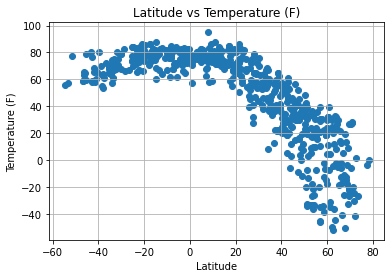

In [31]:
plt.scatter(weather_df["Lat"], weather_df["Temp"], marker="o")

#Labels
plt.title("Latitude vs Temperature (F)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../../Instructions/output_data/latvstemp.png")

## Latitude vs. Humidity Plot

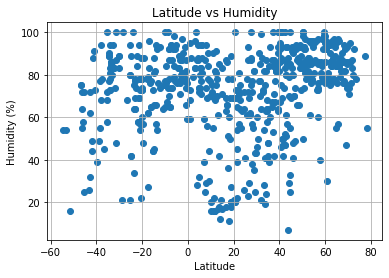

In [32]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

#Labels
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../../Instructions/output_data/latvshumid.png")

## Latitude vs. Cloudiness Plot

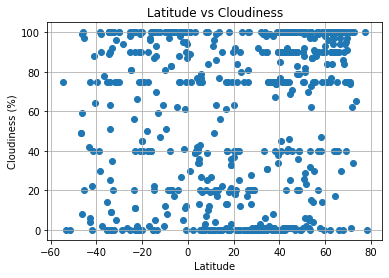

In [35]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

#Labels
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../../Instructions/output_data/latvscloud.png")

## Latitude vs. Wind Speed Plot

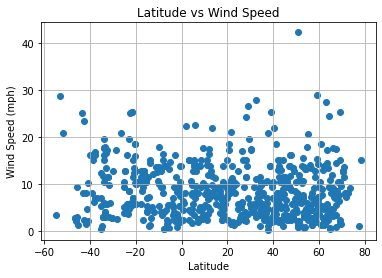

In [36]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")

#Labels
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../../Instructions/output_data/latvswind.png")

## Linear Regression

In [39]:
#For the next bit, creating splits of N/S hemispheres
north = weather_df.loc[weather_df["Lat"] >= 0,:]
south = weather_df.loc[weather_df["Lat"] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

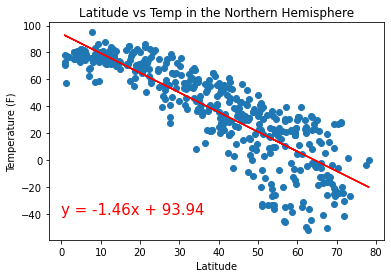

In [64]:
x_values = north["Lat"]

y_values = north["Temp"]

#Linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Regression values and line equation:

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (0,-40),fontsize=15,color="red")
plt.title("Latitude vs Temp in the Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

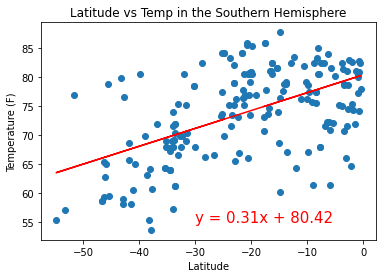

In [65]:
x_values = south["Lat"]
y_values = south["Temp"]

#Linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Regression values and line equation:

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-30,55),fontsize=15,color="red")
plt.title("Latitude vs Temp in the Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

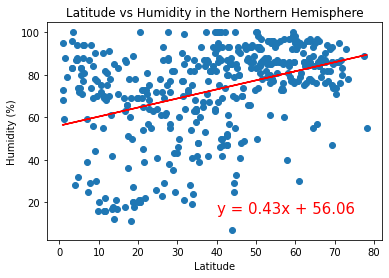

In [66]:
x_values = north["Lat"]
y_values = north["Humidity"]

#Linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Regression values and line equation:

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (40,15),fontsize=15,color="red")
plt.title("Latitude vs Humidity in the Northern Hemisphere")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

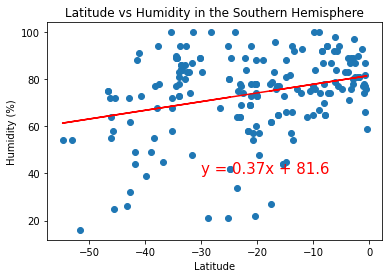

In [67]:
x_values = south["Lat"]
y_values = south["Humidity"]

#Linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Regression values and line equation:

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-30,40),fontsize=15,color="red")
plt.title("Latitude vs Humidity in the Southern Hemisphere")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

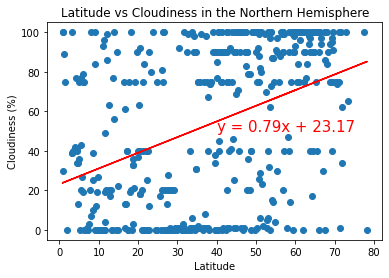

In [68]:
x_values = north["Lat"]
y_values = north["Cloudiness"]

#Linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Regression values and line equation:

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (40,50),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness in the Northern Hemisphere")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

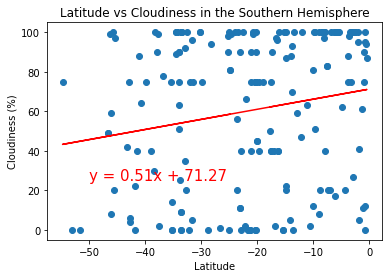

In [69]:
x_values = south["Lat"]
y_values = south["Cloudiness"]

#Linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Regression values and line equation:

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-50,25),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness in the Southern Hemisphere")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

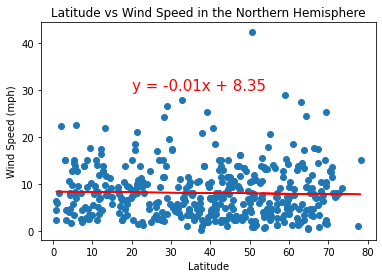

In [70]:
x_values = north["Lat"]
y_values = north["Wind Speed"]

#Linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Regression values and line equation:

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,30),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed in the Northern Hemisphere")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

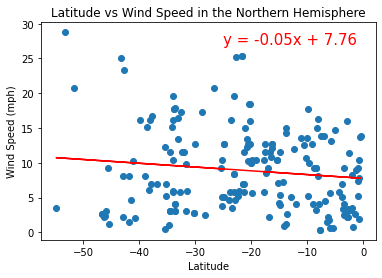

In [71]:
x_values = south["Lat"]
y_values = south["Wind Speed"]

#Linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Regression values and line equation:

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-25,27),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed in the Northern Hemisphere")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.show()